## Project: Writing a Data Scientist Blog Post

For this project I have chosen the Boston AirBnB Dataset 

In [1]:
#import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




In [2]:
#import datasets

#Listings includes full descriptions and average review score
#Reviews includes unique id for each reviewer and detailed comments
#Calendar includes listing id and the price and availability for that day

df_listings = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')
df_calendar = pd.read_csv('calendar.csv')

In [3]:
# Let's expore the listings dataset
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

## As a potential investor in the air BnB space, can I determine the features that influence the daily lodging rates (price) from this dataset?

In [5]:
# let us take a look at some features such as property type, neighborhood, room type etc... that can influence price

df_listings_new = df_listings[['neighbourhood_cleansed','property_type','room_type','bathrooms','bedrooms', 'accommodates', 'beds', 
                               'bed_type','price' ]]

In [6]:
#checking our new dataset, looks like price, the target has the wrong data type
df_listings_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3585 non-null   object 
 1   property_type           3582 non-null   object 
 2   room_type               3585 non-null   object 
 3   bathrooms               3571 non-null   float64
 4   bedrooms                3575 non-null   float64
 5   accommodates            3585 non-null   int64  
 6   beds                    3576 non-null   float64
 7   bed_type                3585 non-null   object 
 8   price                   3585 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 252.2+ KB


In [7]:
#let us perform some cleaning
#first we remove the comma in the price column, then split to remove the $ and finally convert to numeric

df_price = df_listings_new['price'].str.replace(',', '')
df_price = df_price.str.split('$', n=1, expand=True)
df_price_new = df_price.rename(columns = {1:'price_new'})
df_price_new = df_price_new['price_new'].apply(pd.to_numeric)

In [8]:
df_listings_newer = pd.concat([df_listings_new, df_price_new], axis=1)

In [9]:
# created a new dataset with a new numeric column called price_new

df_listings_newer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3585 non-null   object 
 1   property_type           3582 non-null   object 
 2   room_type               3585 non-null   object 
 3   bathrooms               3571 non-null   float64
 4   bedrooms                3575 non-null   float64
 5   accommodates            3585 non-null   int64  
 6   beds                    3576 non-null   float64
 7   bed_type                3585 non-null   object 
 8   price                   3585 non-null   object 
 9   price_new               3585 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 280.2+ KB


In [10]:
# We have about 0.04% of missing data, we can drop them
df_listings_newer = df_listings_newer.dropna().reset_index(drop=True)

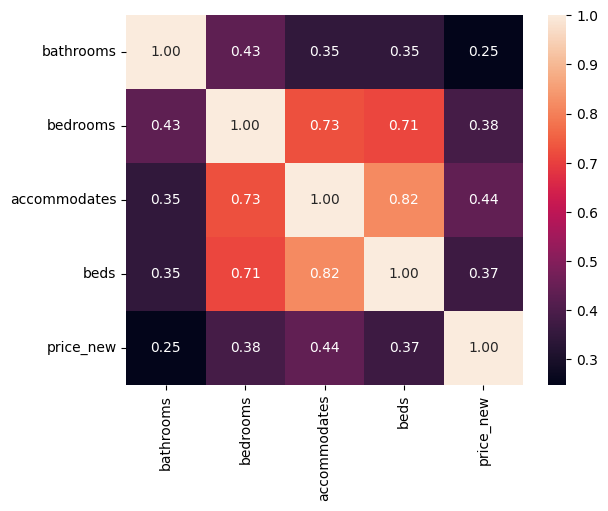

In [11]:
#Checking the correlation between price and continous variables
sns.heatmap(df_listings_newer.corr(), annot=True, fmt=".2f");

The correlation map above shows a moderate positive correlation between the price of a listing & number of bathrooms, bedrooms, beds and the number of guests a listing can accommodate

## Question : As a potential investor, can I determine what category of listings command the highest rates in the market?

In [12]:
#Let us take a look at categorical variables neighborhood, property type, room type and bed type

# Function to draw box plots of price vs categorical variables
def draw_boxplot(x, xlabel):
    
    bp = sns.boxplot(x=x , y = df_listings_newer.price_new)
    bp.set(title = 'Box Plot', xlabel = xlabel, ylabel = 'Price')
    for item in bp.get_xticklabels():
        item.set_rotation(90)

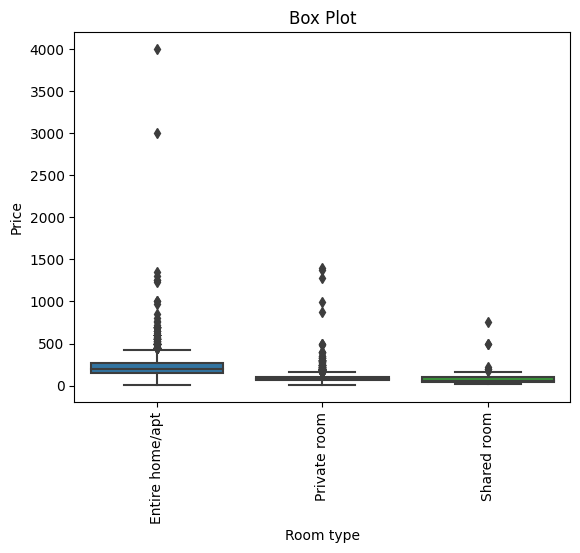

In [13]:
#Box plot of price and Room type

draw_boxplot(df_listings_newer.room_type, "Room type")

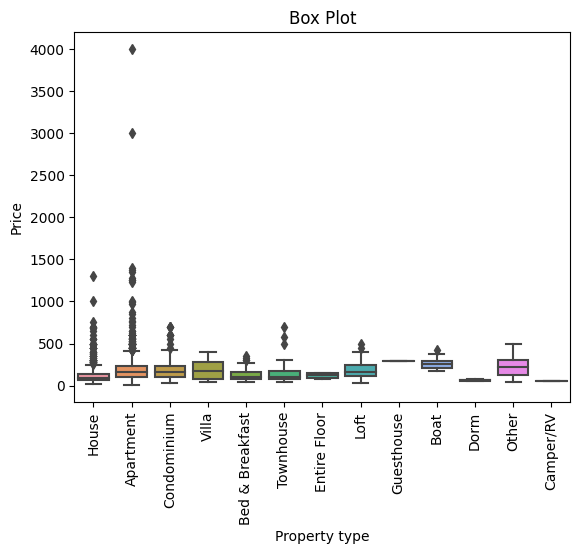

In [14]:
#Box plot of price and Property type
draw_boxplot(df_listings_newer.property_type, "Property type")

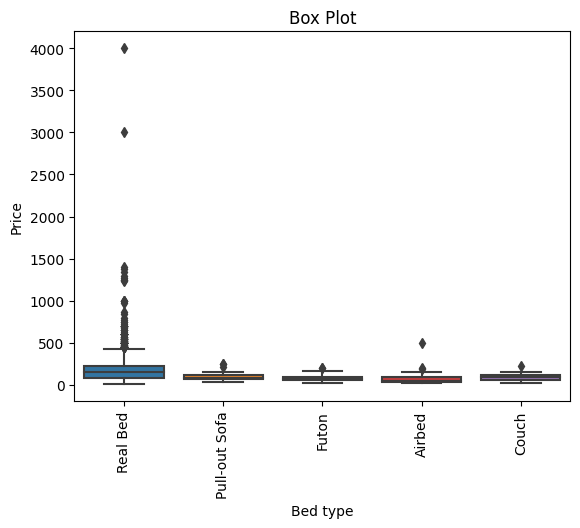

In [15]:
#Box plot of price and Bed type
draw_boxplot(df_listings_newer.bed_type, "Bed type")

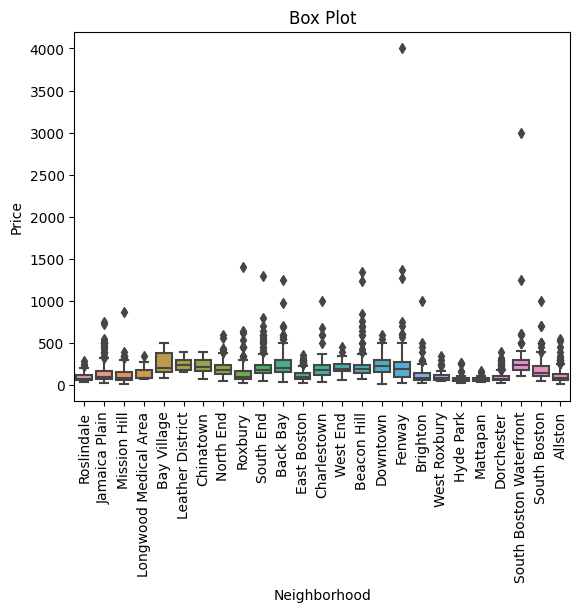

In [16]:
#Box plot of price and Neighborhood 
draw_boxplot(df_listings_newer.neighbourhood_cleansed, "Neighborhood")

In [17]:
#The box plots above show some outliers which should be handled before calculating the mean

#Using the z-score method for removing outliers and setting threshold as 3

from scipy import stats

z = np.abs(stats.zscore(df_listings_newer['price_new']))

threshold_z = 3

outlier_indices = np.where(z > threshold_z)[0]
df_no_outliers = df_listings_newer.drop(outlier_indices).reset_index(drop=True)

   

In [18]:
#average price of neighbourhood
grouping_neighb = pd.DataFrame(df_no_outliers.groupby('neighbourhood_cleansed')['price_new'].mean().sort_values(ascending = False))
grouping_neighb

,price_new
neighbourhood_cleansed,
Bay Village,266.833333
South Boston Waterfront,261.148148
Leather District,253.600000
Downtown,236.730994
Back Bay,232.387755
Chinatown,232.352113
West End,209.591837
Beacon Hill,199.618280
North End,197.503546


In [19]:
#average price of property types
grouping_prop_types = pd.DataFrame(df_no_outliers.groupby('property_type')['price_new'].mean().sort_values(ascending = False))
grouping_prop_types

,price_new
property_type,
Guesthouse,289.000000
Boat,268.833333
Other,229.941176
Villa,189.500000
Loft,185.410256
Condominium,183.548246
Apartment,173.266537
Townhouse,138.641509
Bed & Breakfast,131.000000


In [20]:
#average price of room types
grouping_room_types = pd.DataFrame(df_no_outliers.groupby('room_type')['price_new'].mean().sort_values(ascending = False))
grouping_room_types

,price_new
room_type,
Entire home/apt,216.679309
Private room,92.101545
Shared room,85.076923


In [21]:
#average price of bed types
grouping_bed_types = pd.DataFrame(df_no_outliers.groupby('bed_type')['price_new'].mean().sort_values(ascending = False))
grouping_bed_types

,price_new
bed_type,
Real Bed,168.684770
Pull-out Sofa,101.612903
Couch,99.600000
Futon,85.254902
Airbed,78.675000


From the the box plots and aggregation above, the data suggests that: <br/> 1. <b>Bay Village</b>  and <b>South Boston Waterfront</b> are top of the list in the neighborhood category. <br/> 2. <b>Guesthouse</b> and <b>Boat</b> property type command the highest average daily rates.  <br/> 3. <b>Entire home/apt</b> tops the list in room type category. <br/> 4. <b>Real Bed</b> tops the list in bed type category.

## Question :After exploring this dataset and looking at how these features influence price, Can we predict the price of a new listing ??

In [22]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3520 entries, 0 to 3519
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3520 non-null   object 
 1   property_type           3520 non-null   object 
 2   room_type               3520 non-null   object 
 3   bathrooms               3520 non-null   float64
 4   bedrooms                3520 non-null   float64
 5   accommodates            3520 non-null   int64  
 6   beds                    3520 non-null   float64
 7   bed_type                3520 non-null   object 
 8   price                   3520 non-null   object 
 9   price_new               3520 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 275.1+ KB


In [23]:
#dropping the old price column
df_no_outliers = df_no_outliers.drop(columns = 'price')

In [24]:
df_no_outliers

,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,accommodates,beds,bed_type,price_new
0,Roslindale,House,Entire home/apt,1.5,2.0,4,3.0,Real Bed,250.0
1,Roslindale,Apartment,Private room,1.0,1.0,2,1.0,Real Bed,65.0
2,Roslindale,Apartment,Private room,1.0,1.0,2,1.0,Real Bed,65.0
3,Roslindale,House,Private room,1.0,1.0,4,2.0,Real Bed,75.0
4,Roslindale,House,Private room,1.5,1.0,2,2.0,Real Bed,79.0
...,...,...,...,...,...,...,...,...,...
3515,Charlestown,Apartment,Private room,1.0,1.0,3,1.0,Real Bed,69.0
3516,Allston,Apartment,Private room,1.0,1.0,2,1.0,Real Bed,150.0
3517,Charlestown,Apartment,Entire home/apt,1.0,1.0,4,1.0,Real Bed,198.0
3518,Charlestown,Apartment,Private room,1.0,1.0,2,1.0,Real Bed,65.0


In [25]:
#Building our first model with only continous features


X = df_no_outliers[['bathrooms', 'bedrooms', 'beds', 'accommodates']]
    

y = df_no_outliers['price_new']


#split into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 42) 

#Instantiate Model 
lr = LinearRegression()

#Fit
lr.fit(X_train, y_train)

#Predict and score the model
y_test_preds = lr.predict(X_test)
y_train_preds = lr.predict(X_train)

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print("rsquared on the training data = {}".format(train_score))
print("rsquared on the test data = {}".format(test_score))


rsquared on the training data = 0.32206968360142774
rsquared on the test data = 0.38818022202600533


In [26]:
#Now let us throw in the categorical variables we have been looking at

cat_cols_list = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type']

def build_model(data, target, cat_cols, test_size= .30, random_state = 42):
    
    #iterating through each categorical variables and creating dummy variables
    for col in cat_cols:
        try:
            data = pd.concat([data.drop(col, axis=1), pd.get_dummies(data[col])], axis =1)
        except:
            continue

    #choose features
    X = data.drop('price_new', axis=1)

    #target
    y = data['price_new']


    #split into train and test set

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123) 

    #Instantiate Model 
    lr = LinearRegression()

    #Fit
    lr.fit(X_train, y_train)

    #Predict and score the model
    y_test_preds = lr.predict(X_test)
    y_train_preds = lr.predict(X_train)

    train_score = r2_score(y_train, y_train_preds)
    test_score = r2_score(y_test, y_test_preds)
   
    return train_score, test_score, lr, X_train, X_test, y_train, y_test

In [27]:
train_score, test_score, lr, X_train, X_test, y_train, y_test = build_model(df_no_outliers, 'price_new', cat_cols_list)
print("rsquared on the training data = {}".format(train_score))
print("rsquared on the test data = {}".format(test_score))

rsquared on the training data = 0.6065828150421844
rsquared on the test data = -2.3379073982186206e+21


Oops! this is much worse than our first attempt. 

In [28]:
#let us try using just categorical variables with less than 10 categories. These perform better in a regression

df_try = df_no_outliers.drop(columns =['neighbourhood_cleansed', 'property_type'])
cat_cols_list_two = ['room_type', 'bed_type']

train_score, test_score, lr, X_train, X_test, y_train, y_test = build_model(df_try, 'price_new', cat_cols_list_two)

print("rsquared on the training data = {}".format(train_score))
print("rsquared on the test data = {}".format(test_score))

rsquared on the training data = 0.48294308433525257
rsquared on the test data = 0.4936122309298774


Our model has improved but still not very good, let us consider one important feature "amenities". 
This feature requires some preparation and this is covered in the next jupyter notebook file